<a href="https://colab.research.google.com/github/zlximon/Tensorflow_DL/blob/master/TransferLearning(fine_tuning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# download the helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-05-23 08:30:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-05-23 08:30:50 (117 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
#import our helper functions 
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir


In [ ]:
# downloding data 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")


--2022-05-23 07:59:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   138MB/s    in 1.2s    

2022-05-23 07:59:45 (138 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/trai

In [ ]:
#set our train and test directions 
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf
IMAGE_SIZE=(224,224)

train_data_10p=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,image_size=IMAGE_SIZE, label_mode="categorical",batch_size=32)
test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,image_size=IMAGE_SIZE, label_mode="categorical",batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
#in this way of creation train_data , our output type is BatchDataset with is diffrent from previous one 
train_data_10p

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
train_data_10p.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
#creating model with functional API , functional API gives more flexibility
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False 
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
#x=tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(input) , if we need normalizing 
x = base_model(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_layer")(x)#
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)
model1=tf.keras.Model(inputs, outputs)
model1.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history1=model1.fit(train_data_10p,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10p),
                                 validation_data=test_data,
                                 validation_steps=int(0.25 * len(test_data)),
                                 callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                        experiment_name="10_percent_feature_extraction")])

16719872/16705208 [==============================] - 0s 0us/step
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20220523-075956
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9420 - accuracy: 0.3680

KeyboardInterrupt: ignored

In [ ]:
#model1 evaluation
model1.evaluate(test_data)

In [ ]:
# see our model layers
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

In [ ]:
base_model.summary()

In [ ]:
model1.summary()

In [ ]:
plot_loss_curves(history1)

In [ ]:
#GlobalAveragePooling2D
tf.random.set_seed(42)
input_shape=(1,4,4,3)
input_tensor=tf.random.normal(input_shape)
#print("random input tensor :\n",input_tensor)
GlobalAveragePooling2D=tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print("GlobalAveragePooling2D tensor :\n",GlobalAveragePooling2D)

print("input_tensor",input_tensor.shape)
print("input_shape",GlobalAveragePooling2D.shape)
#GlobalAveragePooling2D condensed our layers 

In [ ]:
tf.reduce_mean(input_tensor,axis=[1,2])

so GlobalAveragePooling2D , takes the average the second , and third dimension and replace them  

In [ ]:
#GlobalMaxPooling2D
tf.random.set_seed(42)
input_shape=(1,4,4,3)
input_tensor=tf.random.normal(input_shape)
#print("random input tensor :\n",input_tensor)
GlobalMaxPooling2D=tf.keras.layers.GlobalMaxPooling2D()(input_tensor)
print("GlobalMaxPooling2D tensor :\n",GlobalMaxPooling2D)

print("input_tensor",input_tensor.shape)
print("input_shape",GlobalMaxPooling2D.shape)
#GlobalMaxPooling2D condensed our layers 

In [ ]:
tf.reduce_max(input_tensor,axis=[1,2])

#Models with 1% of data 

In [ ]:
#download the 1% dataset
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip 
unzip_data("10_food_classes_1_percent.zip")

--2022-05-23 08:01:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.195.128, 2607:f8b0:400e:c05::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   240MB/s    in 0.5s    

2022-05-23 08:01:21 (240 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
import tensorflow as tf

In [ ]:

train_dir_1p="10_food_classes_1_percent/train"
test_dir="10_food_classes_1_percent/test"

In [ ]:
IMG_SIZE=(224,224)
train_data_1p=tf.keras.preprocessing.image_dataset_from_directory(train_dir_1p,label_mode="categorical",image_size=IMAGE_SIZE,batch_size=32  ,)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode="categorical",image_size=IMAGE_SIZE,batch_size=32  ,)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


#model wtih data augmentation 

we can use data augmentation  and rescaling as a layer with preprocessing layer
, it has some benefits vs ImageDataGenerator

In [ ]:
#Data augmentation Layer
data_augmentation=tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
  tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
#  tf.keras.layers.experimental.preprocessing.Rescaling(1/255.) if we want to rescale 


  ])

(-0.5, 511.5, 511.5, -0.5)

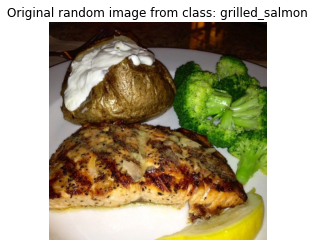

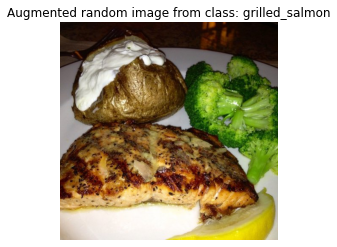

In [ ]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1p.class_names) # choose a random class
target_dir = "10_food_classes_1_percent/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False)

In [ ]:
#creating model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_2 = tf.keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2_percent = model_2.fit(train_data_1p,
                    epochs=5,
                    steps_per_epoch=len(train_data_1p),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), 
                    
                    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])


In [ ]:
model_2.evaluate(test_data)

In [ ]:
plot_loss_curves(history_2_percent)

# creating another model with 10% and with augmneted data 

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

--2022-05-23 08:31:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.128, 173.194.192.128, 209.85.146.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   277MB/s    in 0.6s    

2022-05-23 08:31:16 (277 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
import tensorflow as tf
IMG_SIZE=(224,224)
train_data_10p=tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,label_mode="categorical",image_size=IMG_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode="categorical",image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
#creating model with sequential API
data_augmentation=tf.keras.models.Sequential([
tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
],name="data_augmentationo")
input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
inputs=tf.keras.layers.Input(shape=input_shape,name="input_layer")
x=data_augmentation(inputs)
x=base_model(x,training=False)#if we use batchnorm layers ,we should set training to False
x=tf.keras.layers.GlobalAveragePooling2D(name="GlobalAveragePooling2D")(x)
outputs=tf.keras.layers.Dense(10,activation="softmax",name="output")(x)
model3=tf.keras.Model(inputs, outputs)
model3.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
model3.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentationo (Sequent  (None, 224, 224, 3)      0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 GlobalAveragePooling2D (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output (Dense)              (None, 10)                12810     
                                                              

#creating model checkpoint callbacks

In [ ]:
#creating checkpoint callbacks
checkpoint_path="ten_percent_model_checkpoint_weights/checkpoint.ckpt"
#create a model checkpoint weights 
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,save_best_only=False,save_freq="epoch",verbose=1)

In [ ]:
#fine tuning with 5 more epochs
initial_epochs=5
history3=model3.fit(train_data_10p,epochs=5,steps_per_epoch=len(train_data_10p),validation_data=test_data,validation_steps=(0.25 * len(test_data)),
 callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="model with 10% augmented data"),checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/model with 10% augmented data/20220523-083157
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0552 - accuracy: 0.3107
Epoch 1: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 29s 561ms/step - loss: 2.0552 - accuracy: 0.3107 - val_loss: 1.5804 - val_accuracy: 0.6125
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4165 - accuracy: 0.6493
Epoch 2: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 11s 448ms/step - loss: 1.4165 - accuracy: 0.6493 - val_loss: 1.1152 - val_accuracy: 0.7266
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1047 - accuracy: 0.7267
Epoch 3: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 9s 383ms/step - loss: 1.1047 - accuracy: 0.7267 - val_loss: 0.9059 - val_accuracy: 0.

In [ ]:
#model1 evaluation
model1.evaluate(test_data)

In [ ]:
result_3=model3.evaluate(test_data)

**important note : in here we noticed that with data augmentation , our result gets worse **

In [ ]:
  plot_loss_curves(history3)

In [ ]:
model3.load_weights(checkpoint_path)

In [ ]:
#now we evaluate model 3 with loaded weight
loaded_weight_result=model3.evaluate(test_data)

In [ ]:
import numpy as np
np.isclose(np.array(loaded_weight_result),np.array(result_3))

#create a model with fine_tuning and 10% of data 
in fine tuning we unfreeze some of layers that near the output layers
we use weights of model3 to learn new model

In [ ]:
# we set the last 10 layers of base_model trainable 
base_model.trainalbe=True# in here we unfreezed all of our layers
for layer in base_model.layers[:-10]:
  layer.trainable=False # in here we freezed the all of layers except last 10 layers

# recomplie the model
model3.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(lr=0.0001),metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**important point : in fine_tuning we dont want to change pre-learned patterns too much , so we change the learning rate (decrease it )**





In [ ]:
for layer_number,layer in enumerate(model3.layers[2].layers):
   print(layer_number,layer.name)

In [ ]:
print(len(model3.trainable_variables))

In [ ]:
#fit the model with 5 more epochs
fine_tune_epochs=initial_epochs+5# fine tune for another 5 epoch
history_fined=model3.fit(train_data_10p,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               validation_steps=int(0.25 * len(test_data)),
                                               initial_epoch=history3.epoch[-1], # start training from previous last epoch
                                               callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                      experiment_name="10_percent_fine_tune_last_10")])
#initial_epoch : start training from previous last epoch 

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20220523-083353
Epoch 5/10
24/24 [==============================] - 16s 440ms/step - loss: 0.7581 - accuracy: 0.8053 - val_loss: 0.7293 - val_accuracy: 0.7895
Epoch 6/10
24/24 [==============================] - 8s 333ms/step - loss: 0.7360 - accuracy: 0.8067 - val_loss: 0.7250 - val_accuracy: 0.7895
Epoch 7/10
24/24 [==============================] - 8s 306ms/step - loss: 0.7475 - accuracy: 0.8120 - val_loss: 0.6945 - val_accuracy: 0.8010
Epoch 8/10
24/24 [==============================] - 9s 376ms/step - loss: 0.7091 - accuracy: 0.8280 - val_loss: 0.7044 - val_accuracy: 0.7845
Epoch 9/10
24/24 [==============================] - 8s 320ms/step - loss: 0.7377 - accuracy: 0.8067 - val_loss: 0.6960 - val_accuracy: 0.7961
Epoch 10/10
24/24 [==============================] - 8s 330ms/step - loss: 0.7133 - accuracy: 0.8173 - val_loss: 0.7021 - val_accuracy: 0.7944


In [ ]:
result_fine_tune_10p=model3.evaluate(test_data)

In [ ]:
plot_loss_curves(history_fined)

In [ ]:
#create a function to compare training histories
def compare_historys(original_history, new_history, initial_epochs=5):
  """
  Compares two TensorFlow History objects.
  """
  # Get original history measurements
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  # Combine original history metrics with new_history metrics
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Make plot for accuracy
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")

  # Make plot for loss
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Val Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")

In [ ]:
compare_historys(history3,history_fined)

#creating a model with full data and fine_tuning

In [ ]:
#download the full dataset
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2022-05-23 08:35:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.159.128, 142.251.120.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.159.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   207MB/s    in 2.4s    

2022-05-23 08:35:09 (207 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
#set directories
train_dir="10_food_classes_all_data/train"
test_dir ="10_food_classes_all_data/test"

In [ ]:
IMG_SIZE=(224,224)
train_data_full=tf.keras.preprocessing.image_dataset_from_directory(train_dir,label_mode="categorical",image_size=IMG_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode="categorical",image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# revert model 3 to feature extraction
model3.load_weights(checkpoint_path)

In [ ]:
model3.evaluate(test_data)

In [ ]:
#compile the model
model3.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(0.0001),metrics=["accuracy"])

In [ ]:
initial_epochs=5

In [ ]:
#fit the model with 5 more epochs and fine tuning
fine_tune_epochs= initial_epochs+5
history_full_data=model3.fit(train_data_full,epochs=fine_tune_epochs,validation_data=test_data,validation_steps=(0.25*len(test_data)),
           initial_epoch=history3.epoch[-1], # start training from previous last epoch
                                               callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                      experiment_name="full_fine_tune_last_10")]                              )

Saving TensorBoard log files to: transfer_learning/full_fine_tune_last_10/20220523-083639
Epoch 5/10
235/235 [==============================] - 60s 227ms/step - loss: 0.9008 - accuracy: 0.7368 - val_loss: 0.6324 - val_accuracy: 0.8359
Epoch 6/10
235/235 [==============================] - 44s 185ms/step - loss: 0.8451 - accuracy: 0.7492 - val_loss: 0.5578 - val_accuracy: 0.8547
Epoch 7/10
235/235 [==============================] - 40s 168ms/step - loss: 0.8047 - accuracy: 0.7587 - val_loss: 0.5229 - val_accuracy: 0.8594
Epoch 8/10
235/235 [==============================] - 40s 168ms/step - loss: 0.7716 - accuracy: 0.7615 - val_loss: 0.5263 - val_accuracy: 0.8562
Epoch 9/10
235/235 [==============================] - 38s 159ms/step - loss: 0.7505 - accuracy: 0.7724 - val_loss: 0.4944 - val_accuracy: 0.8547
Epoch 10/10
235/235 [==============================] - 36s 153ms/step - loss: 0.7255 - accuracy: 0.7747 - val_loss: 0.5130 - val_accuracy: 0.8531


In [ ]:
result_full_data=model3.evaluate(test_data)

79/79 [==============================] - 8s 97ms/step - loss: 0.4881 - accuracy: 0.8584
